# Sales Analysis

## Project: Retail Sales Performance Analysis (2023)
### Objective
The goal of this analysis is to clean, transform, and explore retail transaction data to identify key revenue drivers across product categories, customer segments, and time periods.

## 1. Environment Setup & Data Ingestion
I begin by importing the necessary Python libraries for data manipulation and visualization, and loading the four primary datasets: transactions, products, stores, and customers.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load datasets
sales_transaction = pd.read_csv('sales_transaction.csv', parse_dates=['date'])
products = pd.read_csv('products.csv')
stores = pd.read_csv('stores.csv')
customers = pd.read_csv('customers.csv')

In [128]:
sales_transaction.head(20)

,transaction_id,date,customer_id,product_id,store_id,quantity,unit_price,discount
0,T-1000,07/05/2023,CUST-140,P004,ST-2,NaN,37.5,0.2
1,T-1001,2023-02-02,CUST-170,P004,ST-5,5.0,37.5,0.2
2,T-1002,2023-08-30,CUST-195,P003,ST-4,4.0,120.0,0.1
3,T-1003,2023-01-15,CUST-168,P004,ST-3,5.0,37.5,0.0
4,T-1004,2023-11-18,CUST-133,P001,ST-2,5.0,300.0,0.0
5,T-1005,2023-10-26,CUST-103,P002,ST-4,3.0,225.0,0.2
6,T-1006,2023-05-08,CUST-167,P005,ST-3,4.0,67.5,0.0
7,T-1007,2023-08-13,CUST-163,P001,ST-4,4.0,300.0,0.0
8,T-1008,2023-04-27,CUST-155,P001,ST-2,5.0,300.0,0.2
9,T-1009,2023-11-22,CUST-192,P003,ST-1,2.0,120.0,0.1


In [129]:
sales_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  2500 non-null   object 
 1   date            2500 non-null   object 
 2   customer_id     2500 non-null   object 
 3   product_id      2500 non-null   object 
 4   store_id        2500 non-null   object 
 5   quantity        2450 non-null   float64
 6   unit_price      2500 non-null   float64
 7   discount        2500 non-null   float64
dtypes: float64(3), object(5)
memory usage: 156.4+ KB


In [130]:
products

,product_id,product_name,category,cost
0,P001,UltraTab 10,Electronics,200
1,P002,SmartWatch v2,Electronics,150
2,P003,Office Chair,Furniture,80
3,P004,Ergo Mouse,Accessories,25
4,P005,Coffee Maker,Appliances,45


In [131]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    5 non-null      object
 1   product_name  5 non-null      object
 2   category      5 non-null      object
 3   cost          5 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 292.0+ bytes


In [132]:
stores

,store_id,city,region
0,ST-1,Bangkok,Central
1,ST-2,Chonburi,East
2,ST-3,Chaing Mai,North
3,ST-4,Khon Kaen,North East
4,ST-5,Pathum Thani,Central


In [133]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   store_id  5 non-null      object
 1   city      5 non-null      object
 2   region    5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


In [134]:
customers.head(20)

,customer_id,segment,signup_date,email_opt_in
0,CUST-101,Corporate,2022-09-30,No
1,CUST-102,Consumer,2022-10-14,Yes
2,CUST-103,Home Office,2023-01-01,NaN
3,CUST-104,Consumer,2022-01-26,Yes
4,CUST-105,Corporate,2023-05-09,NaN
5,CUST-106,Home Office,2022-10-30,NaN
6,CUST-107,Corporate,2022-01-27,No
7,CUST-108,Consumer,2023-04-28,No
8,CUST-109,Corporate,2022-08-18,NaN
9,CUST-110,Corporate,2022-09-29,No


In [135]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   100 non-null    object
 1   segment       100 non-null    object
 2   signup_date   100 non-null    object
 3   email_opt_in  51 non-null     object
dtypes: object(4)
memory usage: 3.3+ KB


## 2. Data Cleaning & Pre-processing
Initial data profiling revealed missing values in the quantity column (approx. 2%) and inconsistent formatting in customer IDs and product names.

#### 2.1 Handling Missing Values & Date Standardization

In [136]:
# Calculate missing value percentage
total_rows = len(sales_transaction)
missing_percent = (sales_transaction.isna().sum() / total_rows)
print(missing_percent)

transaction_id    0.00
date              0.00
customer_id       0.00
product_id        0.00
store_id          0.00
quantity          0.02
unit_price        0.00
discount          0.00
dtype: float64


In [137]:
# Drop rows where quantity is missing
sales_transaction = sales_transaction.dropna(subset=['quantity'])

# Convert transaction dates to standardized datetime format
sales_transaction['date'] = pd.to_datetime(sales_transaction['date'], format='mixed')

sales_transaction.head(20)

,transaction_id,date,customer_id,product_id,store_id,quantity,unit_price,discount
1,T-1001,2023-02-02,CUST-170,P004,ST-5,5.0,37.5,0.2
2,T-1002,2023-08-30,CUST-195,P003,ST-4,4.0,120.0,0.1
3,T-1003,2023-01-15,CUST-168,P004,ST-3,5.0,37.5,0.0
4,T-1004,2023-11-18,CUST-133,P001,ST-2,5.0,300.0,0.0
5,T-1005,2023-10-26,CUST-103,P002,ST-4,3.0,225.0,0.2
6,T-1006,2023-05-08,CUST-167,P005,ST-3,4.0,67.5,0.0
7,T-1007,2023-08-13,CUST-163,P001,ST-4,4.0,300.0,0.0
8,T-1008,2023-04-27,CUST-155,P001,ST-2,5.0,300.0,0.2
9,T-1009,2023-11-22,CUST-192,P003,ST-1,2.0,120.0,0.1
10,T-1010,2023-04-09,CUST-180,P003,ST-1,1.0,120.0,0.0


In [138]:
sales_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2450 entries, 1 to 2499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  2450 non-null   object        
 1   date            2450 non-null   datetime64[ns]
 2   customer_id     2450 non-null   object        
 3   product_id      2450 non-null   object        
 4   store_id        2450 non-null   object        
 5   quantity        2450 non-null   float64       
 6   unit_price      2450 non-null   float64       
 7   discount        2450 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 172.3+ KB


#### 2.2 Text Normalization & Feature Engineering
I cleaned the product names and converted the customer email opt-in status to a boolean for easier segmentation analysis.

In [139]:
# Clean product names
products['product_name'] = products['product_name'].str.title().str.strip()

products['product_name']

0 Ultratab 10
1 Smartwatch V2
2 Office Chair
3 Ergo Mouse
4 Coffee Maker
Name: product_name, dtype: object

In [140]:
# Map email_opt_in to Boolean (True/False)
email_map = {
    'Yes': True,
    'No': False
}

customers['email_opt_in_clean'] = customers['email_opt_in'].map(email_map).fillna(False).astype(bool)

customers.head(20)

,customer_id,segment,signup_date,email_opt_in,email_opt_in_clean
0,CUST-101,Corporate,2022-09-30,No,False
1,CUST-102,Consumer,2022-10-14,Yes,True
2,CUST-103,Home Office,2023-01-01,NaN,False
3,CUST-104,Consumer,2022-01-26,Yes,True
4,CUST-105,Corporate,2023-05-09,NaN,False
5,CUST-106,Home Office,2022-10-30,NaN,False
6,CUST-107,Corporate,2022-01-27,No,False
7,CUST-108,Consumer,2023-04-28,No,False
8,CUST-109,Corporate,2022-08-18,NaN,False
9,CUST-110,Corporate,2022-09-29,No,False


In [141]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         100 non-null    object
 1   segment             100 non-null    object
 2   signup_date         100 non-null    object
 3   email_opt_in        51 non-null     object
 4   email_opt_in_clean  100 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 3.4+ KB


## 3. Data Merging & Transformation
To perform a comprehensive analysis, we merge the transaction data with product, customer, and store metadata. We then calculate financial metrics like Net Price and Total Revenue.

In [142]:
# Merge datasets into a master dataframe
sales_merge = sales_transaction.merge(products, on='product_id', how='left')\
                      .merge(customers, on='customer_id', how='left')\
                      .merge(stores, on='store_id', how='left')

# Filter for 2023 data and calculate revenue
sales_23 = sales_merge[sales_merge['date'].dt.year == 2023].drop(columns=['email_opt_in'])

sales_23['date'] = sales_23['date'].dt.strftime('%Y-%m-%d')

sales_23['net_price'] = sales_23['unit_price'] * (1 - sales_23['discount'])
sales_23['total_revenue'] = sales_23['net_price'] * sales_23['quantity']

# Reorder columns
col_order = ['transaction_id', 'date', 'customer_id', 'segment', 'email_opt_in_clean', 'product_name', 'category', 'quantity', 'unit_price', 'discount', 'net_price', 'total_revenue']

sales_23 = sales_23.reindex(columns=col_order)

sales_23.head(20)

,transaction_id,date,customer_id,segment,email_opt_in_clean,product_name,category,quantity,unit_price,discount,net_price,total_revenue
0,T-1001,2023-02-02,CUST-170,Corporate,False,Ergo Mouse,Accessories,5.0,37.5,0.2,30.0,150.0
1,T-1002,2023-08-30,CUST-195,Consumer,False,Office Chair,Furniture,4.0,120.0,0.1,108.0,432.0
2,T-1003,2023-01-15,CUST-168,Consumer,False,Ergo Mouse,Accessories,5.0,37.5,0.0,37.5,187.5
3,T-1004,2023-11-18,CUST-133,Consumer,False,Ultratab 10,Electronics,5.0,300.0,0.0,300.0,1500.0
4,T-1005,2023-10-26,CUST-103,Home Office,False,Smartwatch V2,Electronics,3.0,225.0,0.2,180.0,540.0
5,T-1006,2023-05-08,CUST-167,Corporate,False,Coffee Maker,Appliances,4.0,67.5,0.0,67.5,270.0
6,T-1007,2023-08-13,CUST-163,Home Office,False,Ultratab 10,Electronics,4.0,300.0,0.0,300.0,1200.0
7,T-1008,2023-04-27,CUST-155,Home Office,False,Ultratab 10,Electronics,5.0,300.0,0.2,240.0,1200.0
8,T-1009,2023-11-22,CUST-192,Corporate,False,Office Chair,Furniture,2.0,120.0,0.1,108.0,216.0
9,T-1010,2023-04-09,CUST-180,Consumer,True,Office Chair,Furniture,1.0,120.0,0.0,120.0,120.0


## 4. Exploratory Data Analysis (EDA)

#### 4.1 Product Performance
The Ultratab 10 is our highest revenue generator, contributing over $389,000, despite having lower sales volume than the Office Chair.

In [143]:
# Calculate average of Net Price and Total Tevenue by Product
summarize_product = sales_23.groupby('product_name').agg(
    avg_net_price = ('net_price', 'mean'),
    total_sales = ('total_revenue', 'sum')
).round(2).reset_index()

summarize_product.sort_values('total_sales', ascending=False)

,product_name,avg_net_price,total_sales
4,Ultratab 10,282.12,389370.00
3,Smartwatch V2,211.27,306180.00
2,Office Chair,113.06,181968.00
0,Coffee Maker,63.33,97922.25
1,Ergo Mouse,35.32,49575.00


#### 4.2 Customer Segment Insights
The Corporate segment leads in total revenue, followed by Home Office and Consumer.

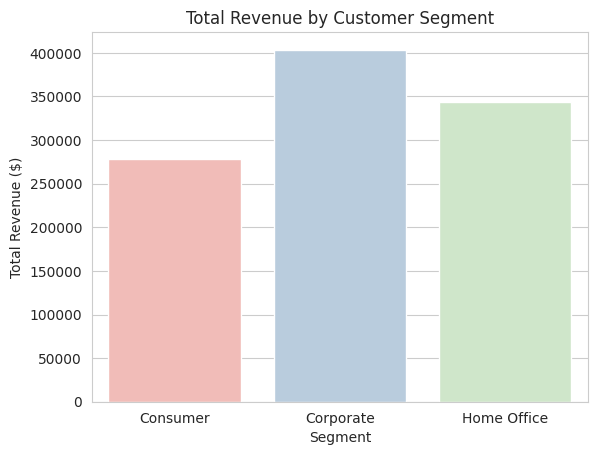

In [159]:
# Calculate Total Revenue by Segment
summarize_segment = sales_23.groupby('segment')['total_revenue'].sum().reset_index()

# Visualizing Total Revenue by Segment
sns.set_style("whitegrid")

sns.barplot(data=summarize_segment, x='segment', y='total_revenue', hue='segment', palette='Pastel1')
plt.xlabel('Segment')
plt.ylabel('Total Revenue ($)')
plt.title('Total Revenue by Customer Segment')
plt.show()

#### 4.3 Email Marketing Impact
A significant insight from the data shows that customers who did not opt into email marketing (False) currently account for a much higher volume of total revenue across all segments. This suggests a major opportunity to improve the conversion and engagement of the "Opt-in" group.

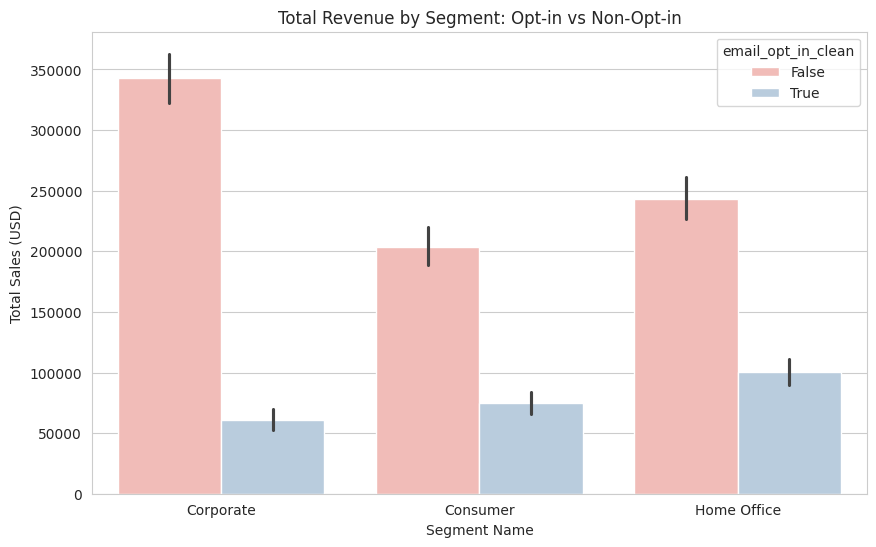

In [161]:
plt.figure(figsize=(10,6))
sns.barplot(data=sales_23, x='segment', y='total_revenue', hue='email_opt_in_clean', palette='Pastel1', estimator=sum)
plt.xlabel('Segment Name')
plt.ylabel('Total Sales (USD)')
plt.title('Total Revenue by Segment: Opt-in vs Non-Opt-in')
plt.show()

## 5. Visualizations Summary
The project produced several key charts to communicate these findings:

#### 5.1 Total Sales by Product: ####
Highlights the dominance of high-ticket electronics.

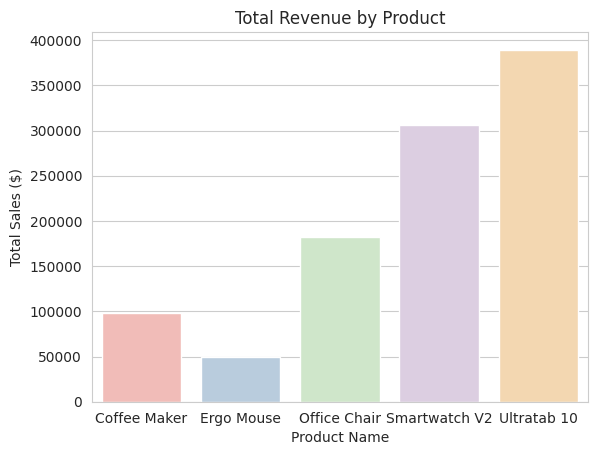

In [163]:
sns.set_style("whitegrid")

# Visaulizing Total Revenue by Product
sns.barplot(data=summarize_product, x='product_name', y='total_sales', hue='product_name', palette='Pastel1')
plt.xlabel('Product Name')
plt.ylabel('Total Sales ($)')
plt.title('Total Revenue by Product')
plt.show()

#### 5.2 Monthly Revenue Trends:
Shows seasonal fluctuations across segments throughout 2023.

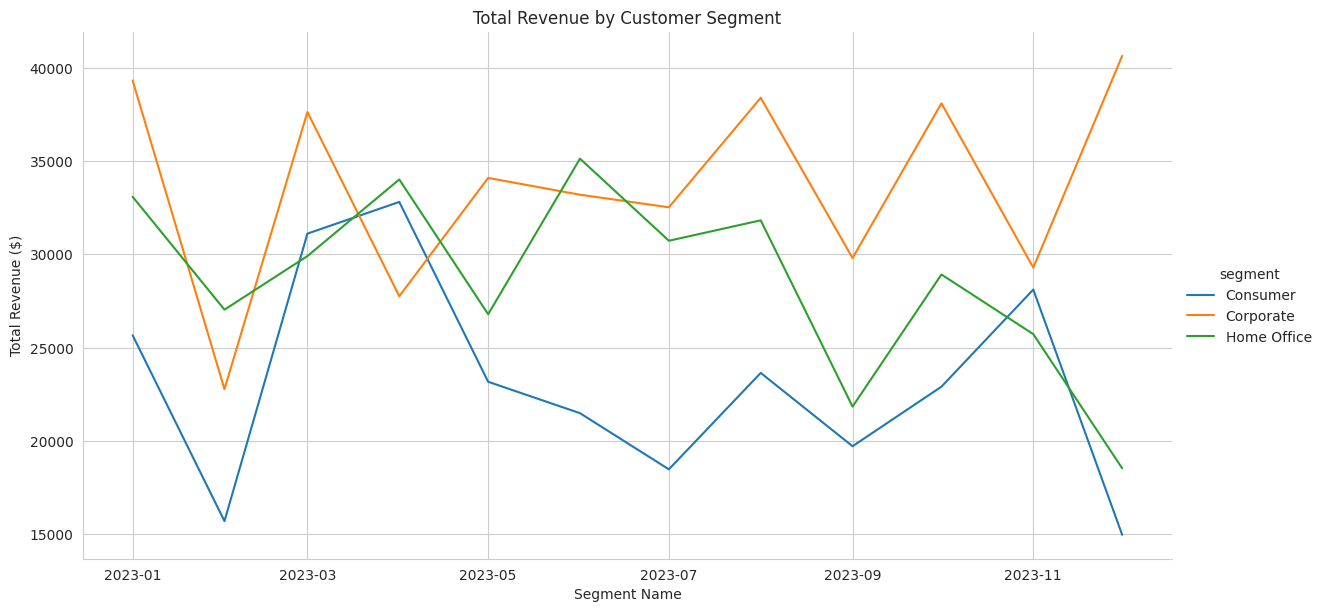

In [165]:
sales_23['year_month'] = pd.to_datetime(sales_23['date']).dt.strftime('%Y-%m')
sales_23['year_month'] = pd.to_datetime(sales_23['year_month'])

month_sales = sales_23.groupby(['segment', 'year_month'])['total_revenue'].sum().reset_index()

month_sales = pd.DataFrame(month_sales)

sns.relplot(data=month_sales, x='year_month', y='total_revenue', hue='segment', kind='line', height=6, aspect=2)
plt.xlabel('Segment Name')
plt.ylabel('Total Revenue ($)')
plt.title('Total Revenue by Customer Segment')
plt.show()

#### 5.3 AOV by Category:
Compares the Average Order Value to identify which categories drive the most value per transaction

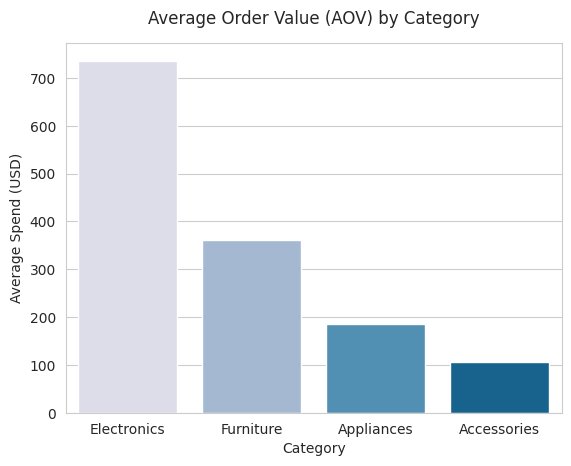

In [157]:
#Category Performance
cat_perf = sales_23.groupby('category')['total_revenue'].mean().sort_values(ascending=False)

sns.barplot(x=cat_perf.index, y=cat_perf.values, hue=cat_perf.index, palette='PuBu')
plt.title('Average Order Value (AOV) by Category', y=1.03)
plt.xlabel('Category')
plt.ylabel('Average Spend (USD)')
plt.show()